<a href="https://colab.research.google.com/github/RC-RX-DEV-AUX/DataScienceCourseFullLabs/blob/main/Lab_modelo_LSTM_129_treino.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [35]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from keras.models import Sequential
from keras.layers import Dense, Dropout, LSTM
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_squared_error

In [36]:
dataset_train_obj = pd.read_csv("Salestrain.csv")

In [37]:
dataset_train_obj.shape

(96, 1)

In [38]:
dataset_train_obj.head(6)

,data
0,112
1,118
2,132
3,129
4,121
5,135


In [39]:
dataset_train_obj

,data
0,112
1,118
2,132
3,129
4,121
...,...
91,405
92,355
93,306
94,271


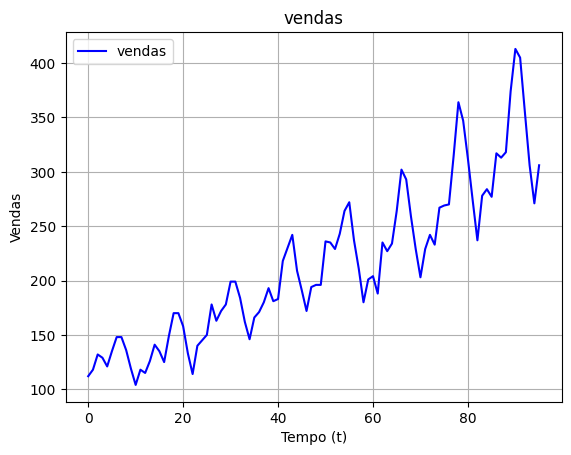

In [40]:
plt.plot(dataset_train_obj, color = 'blue', label = 'vendas')
plt.title("vendas")
plt.xlabel("Tempo (t)")
plt.ylabel("Vendas")
plt.legend()
plt.grid(True)
plt.show()

In [41]:
sc_obj = MinMaxScaler(feature_range = (0,1))
trainig_set_scaled = sc_obj.fit_transform(dataset_train_obj)

In [42]:
x_treino = []
y_treino = []
for x in range(90, len(trainig_set_scaled)):
  data = trainig_set_scaled[x-90:x,0]
  x_treino.append(data)
  y_treino.append(trainig_set_scaled[x,0])
x_treino = np.array(x_treino).reshape(-1, 90, 1)
y_treino = np.array(y_treino)

In [43]:
modelo_obj = Sequential() ##instancia/objeto de modelo ML de uma RNA
modelo_obj.add(LSTM(units = 100, return_sequences = True, input_shape = (x_treino.shape[1],1)))
modelo_obj.add(Dropout(0.2))
modelo_obj.add(LSTM(units = 100, return_sequences = True))
modelo_obj.add(Dropout(0.2))
modelo_obj.add(LSTM(units = 100, return_sequences = True))
modelo_obj.add(Dropout(0.2))
modelo_obj.add(LSTM(units = 100))
modelo_obj.add(Dropout(0.2))
modelo_obj.add(Dense(units = 1))

/usr/local/lib/python3.10/dist-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


In [44]:
modelo_obj.compile(optimizer = "adam", loss = "mean_squared_error")
modelo_obj.fit(x_treino, y_treino, epochs = 300, batch_size = 1)

Epoch 1/300
6/6 ━━━━━━━━━━━━━━━━━━━━ 9s 356ms/step - loss: 0.3648
Epoch 2/300
6/6 ━━━━━━━━━━━━━━━━━━━━ 3s 453ms/step - loss: 0.2472
Epoch 3/300
6/6 ━━━━━━━━━━━━━━━━━━━━ 4s 244ms/step - loss: 0.3256
Epoch 4/300
6/6 ━━━━━━━━━━━━━━━━━━━━ 2s 233ms/step - loss: 0.0596
Epoch 5/300
6/6 ━━━━━━━━━━━━━━━━━━━━ 1s 237ms/step - loss: 0.0539
Epoch 6/300
6/6 ━━━━━━━━━━━━━━━━━━━━ 2s 242ms/step - loss: 0.0529
Epoch 7/300
6/6 ━━━━━━━━━━━━━━━━━━━━ 2s 296ms/step - loss: 0.0927
Epoch 8/300
6/6 ━━━━━━━━━━━━━━━━━━━━ 3s 451ms/step - loss: 0.0430
Epoch 9/300
6/6 ━━━━━━━━━━━━━━━━━━━━ 4s 242ms/step - loss: 0.0146
Epoch 10/300
6/6 ━━━━━━━━━━━━━━━━━━━━ 2s 309ms/step - loss: 0.0548
Epoch 11/300
6/6 ━━━━━━━━━━━━━━━━━━━━ 2s 242ms/step - loss: 0.0400
Epoch 12/300
6/6 ━━━━━━━━━━━━━━━━━━━━ 2s 235ms/step - loss: 0.0520
Epoch 13/300
6/6 ━━━━━━━━━━━━━━━━━━━━ 4s 547ms/step - loss: 0.0296
Epoch 14/300
6/6 ━━━━━━━━━━━━━━━━━━━━ 3s 228ms/step - loss: 0.0281
Epoch 15/300
6/6 ━━━━━━━━━━━━━━━━━━━━ 3s 248ms/step - loss: 0.0206
Epoc

In [45]:
dataset_test_obj = pd.read_csv("Salestest.csv")
dataset_test_obj.shape

(48, 1)

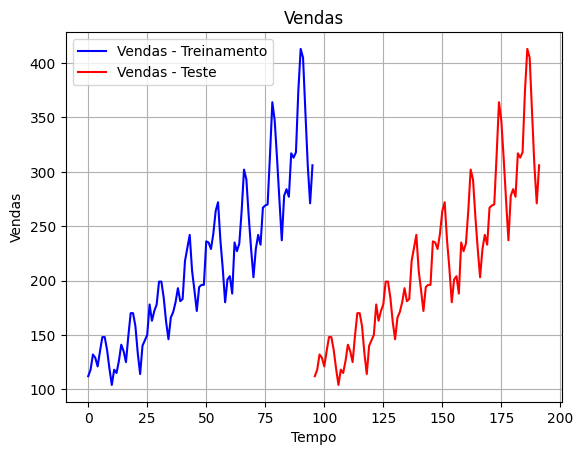

In [52]:
train_values = dataset_train_obj['data'].values
test_values = dataset_train_obj['data'].values
total_values = np.concatenate((train_values, test_values), axis = 0)
time_index = range(len(total_values))
plt.grid(True)
plt.plot(time_index[:len(train_values)], train_values, color = 'blue', label = "Vendas - Treinamento")
plt.plot(time_index[len(train_values):], test_values, color = 'red', label = "Vendas - Teste")
plt.title("Vendas")
plt.xlabel("Tempo")
plt.ylabel("Vendas")
plt.legend()
plt.show()

In [56]:
dataset_test_anomalies_obj = dataset_test_obj.copy()
dataset_test_anomalies_obj.loc[:9, 'data'] = 90
dataset_test_anomalies_obj.loc[10:34, 'data'] = np.random.uniform(100, 200, size = (25,))
dataset_test_anomalies_obj.loc[35:'data'] = 90

<ipython-input-56-0ff06ff130c6>:3: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise an error in a future version of pandas. Value '[152.39737823 193.09485136 113.29533267 160.65328265 138.97543462
 151.6077071  184.22821659 195.03652832 123.22020684 192.86318102
 153.22855398 172.15698787 176.98739362 183.3312516  162.15957699
 136.23400211 162.93511302 125.26527535 136.92398269 152.5785795
 158.82718113 150.42635561 173.97904538 149.53888198 141.11897481]' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  dataset_test_anomalies_obj.loc[10:34, 'data'] = np.random.uniform(100, 200, size = (25,))


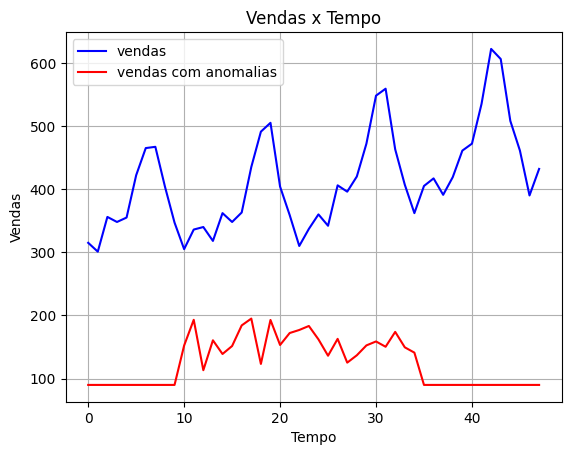

In [57]:
plt.plot(dataset_test_obj, color = 'blue', label = "vendas")
plt.plot(dataset_test_anomalies_obj, color = 'red', label = "vendas com anomalias")
plt.title("Vendas x Tempo")
plt.xlabel("Tempo")
plt.ylabel("Vendas")
plt.legend()
plt.grid(True)
plt.show()

In [59]:
dataset_total_obj = pd.concat((dataset_train_obj["data"], dataset_test_obj["data"]), axis = 0)
inputs = dataset_total_obj[len(dataset_total_obj) - len(dataset_test_obj)-90:]
inputs = pd.DataFrame(inputs, columns = ["data"])
inputs = sc_obj.transform(inputs)

In [60]:
dataset_total_anomalies_obj = pd.concat((dataset_train_obj['data'], dataset_test_anomalies_obj['data']), axis = 0)
inputs_anomalies = dataset_total_anomalies_obj[len(dataset_total_anomalies_obj) - len(dataset_test_anomalies_obj)-90:]
inputs_anomalies = pd.DataFrame(inputs_anomalies, columns = ["data"])
inputs_anomalies = sc_obj.transform(inputs_anomalies)

In [63]:
x_teste = []
x_teste_anomalies = []
for x in range(90, len(inputs)):
  #data = inputs[x-90:x,0]
  x_teste.append(inputs_anomalies[x-90:x,0])
  x_teste_anomalies.append(inputs_anomalies[x-90:x,0])
x_teste = np.array(x_teste)
x_teste_anomalies = np.array(x_teste_anomalies)
x_teste = np.reshape(x_teste, (x_teste.shape[0], x_teste.shape[1], 1))
x_teste_anomalies = np.reshape(x_teste_anomalies, (x_teste_anomalies.shape[0], x_teste_anomalies.shape[1], 1))

In [66]:
predicted_sales = modelo_obj.predict(x_teste)
predicted_sales = sc_obj.inverse_transform(predicted_sales)

predicted_sales_anomalies = modelo_obj.predict(x_teste_anomalies)
predicted_sales_anomalies = sc_obj.inverse_transform(predicted_sales_anomalies)

test_values = test_values[-len(predicted_sales):]

mes_test = mean_squared_error(test_values, predicted_sales)
mes_test_anomalies = mean_squared_error(test_values, predicted_sales_anomalies)

2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 91ms/step
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 145ms/step


In [67]:
print(f"MSE sem anomalias: {mes_test}")
print(f"MSE com anomalias: {mes_test_anomalies}")

MSE sem anomalias: 13664.845836920198
MSE com anomalias: 13664.845836920198


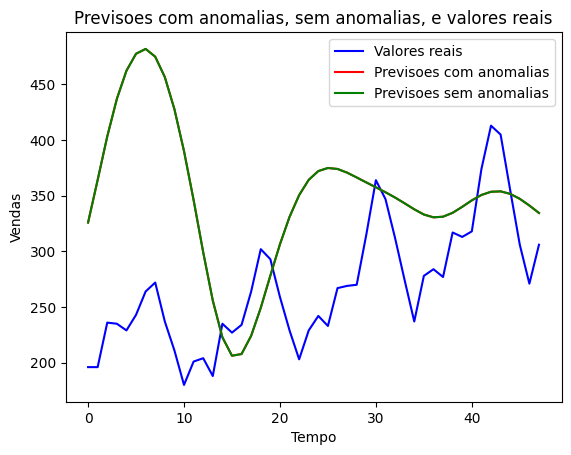

In [69]:
plt.plot(test_values, color = 'blue', label = "Valores reais")
plt.plot(predicted_sales_anomalies, color = 'red', label = "Previsoes com anomalias")
plt.plot(predicted_sales, color = 'green', label = "Previsoes sem anomalias")


plt.title("Previsoes com anomalias, sem anomalias, e valores reais")
plt.xlabel("Tempo")
plt.ylabel("Vendas")
plt.legend()
plt.show()